<div>
<img src='https://raw.githubusercontent.com/Aviyashap/project-tasty-/4e792494a42a4433c18be1fddd60f23efed65452/GIF_backround.gif' hight="100%"/>
</div>

---
### <span style="color: #000000; font-size: 28px"> import File and lib <span>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/Aviyashap/project-tasty-/main/dishes.csv'
tasty_df = pd.read_csv(url)

In [3]:
url_1 = 'https://raw.githubusercontent.com/Aviyashap/project-tasty-/main/tags.csv'
tags_df = pd.read_csv(url_1)

In [4]:
custom_palette = sns.color_palette(["#281fd2", "#79dcf1"])

In [5]:
pei_colors = ['#79dcf1', '#D3D3D3', '#C8C8C8', '#CACACA', '#CCCCCC', '#CECECE', '#D0D0D0',
    '#D2D2D2', '#D4D4D4', '#D6D6D6', '#D8D8D8', '#DADADA','#DCDCDC', '#DEDEDE', '#E0E0E0', '#E2E2E2', '#E4E4E4',
    '#E6E6E6', '#E8E8E8', '#EAEAEA', '#ECECEC', '#EEEEEE','#F0F0F0', '#F2F2F2', '#F4F4F4']
pei_colors_1 = [ '#D3D3D3','#79dcf1', '#C8C8C8', '#CACACA', '#CCCCCC', '#CECECE', '#D0D0D0',
    '#D2D2D2', '#D4D4D4', '#D6D6D6', '#D8D8D8', '#DADADA','#DCDCDC', '#DEDEDE', '#E0E0E0', '#E2E2E2', '#E4E4E4',
    '#E6E6E6', '#E8E8E8', '#EAEAEA', '#ECECEC', '#EEEEEE', '#F0F0F0', '#F2F2F2', '#F4F4F4']

---
### <span style="color: #000000; font-size: 28px"> Introduction <span>

The dataset contains around 4,961 recipes from the Tasty website.
Tasty is a free platform that provides recipes accompanied by video tutorials and various additional features depending on the recipe.

In [6]:
tasty_df.head()

,Unnamed: 0,country,description,id_,keywords,is_shoppable,language,name,slug,video_url,...,total_time,ratings_negative,ratings_positive,score,protein,fat,calories,sugar,carbohydrates,fiber
0,0,US,"Nothing says Sunday morning like a warm, gooey...",868,"bake sale, breakfast, cinnamon buns, cinnamon ...",True,eng,Homemade Cinnamon Rolls,homemade-cinnamon-rolls,https://vid.tasty.co/output/25812/mp4_640x640/...,...,151,475,17340,98.0,7.0,21.0,479.0,24.0,63.0,1.0
1,1,US,NaN,6124,"1000 whisk omelette, 3 ingredient mac & cheese...",True,eng,Whipped Coffee,whipped-coffee,https://vid.tasty.co/output/163616/landscape_4...,...,15,777,8483,92.0,0.0,0.0,69.0,18.0,18.0,0.0
2,2,US,NaN,3094,"dome pancakes, easy pancakes, japanese fluffy ...",True,eng,Fluffy Pancakes,fluffy-perfect-pancakes,https://vid.tasty.co/output/65088/landscape_48...,...,35,1099,5009,83.0,36.0,50.0,1102.0,12.0,123.0,3.0
3,3,US,NaN,4693,"tasty, tasty 101; cinnamon rolls; holidays, ta...",True,eng,How to Make Cinnamon Rolls,tasty-101-cinnamon-rolls,https://vid.tasty.co/output/121022/landscape_4...,...,190,207,6649,97.0,8.0,25.0,562.0,28.0,74.0,1.0
4,4,ZZ,NaN,1655,NaN,True,eng,Healthy Banana Pancakes,healthy-banana-pancakes,https://vid.tasty.co/output/27116/mp4_640x640/...,...,0,591,3853,87.0,7.0,4.0,184.0,9.0,30.0,4.0


data organization

In [7]:
tasty_df.isnull().sum()

Unnamed: 0              0
country                 0
description          3982
id_                     0
keywords             2462
is_shoppable            0
language                0
name                    0
slug                    0
video_url             530
is_licensed_video       0
is_community            0
thumbnail_url           0
inspired_by          4002
linked_recipes       4928
tags                    0
cook_time               0
prep_time               0
total_time              0
ratings_negative        0
ratings_positive        0
score                  75
protein               499
fat                   499
calories              499
sugar                 500
carbohydrates         499
fiber                 500
dtype: int64

We chose to remove the 'Unnamed: 0' column because it only represents an index and the 'thumbnail_url' column that leads to the recipe image because it has no missing values, meaning it does not provide any information about anomalies and is not relevant for analysis as data. Additionally, we observed that there are many missing values in the 'inspired_by' column, and we chose not to remove it because these are not missing values but original recipes of Tasty.

In [8]:
tasty_df.drop(['Unnamed: 0','thumbnail_url'], axis=1, inplace = True)

In [9]:
inspired = tasty_df['inspired_by'].unique()
inspired[1]

"{'host': 'food52.com', 'url': 'https://food52.com/recipes/40532-the-kitchn-s-lofty-buttermilk-pancakes'}"

In [10]:
tasty_df['inspired_by'] = tasty_df['inspired_by'].fillna("False")
def inspired(val):
    if val == "False":
        return "False"
    else:
        return "True"
tasty_df['inspired_by'] = tasty_df['inspired_by'].apply(inspired)

In [11]:
 tasty_df['inspired_by'].unique()

array(['False', 'True'], dtype=object)

In [12]:
tasty_df["total_time"].value_counts()

total_time
0      4003
30       62
45       51
20       48
60       44
       ... 
16        1
84        1
275       1
355       1
225       1
Name: count, Length: 172, dtype: int64

In [13]:
num_columns =tasty_df.apply(pd.api.types.is_numeric_dtype)
num_columns

country              False
description          False
id_                   True
keywords             False
is_shoppable          True
language             False
name                 False
slug                 False
video_url            False
is_licensed_video     True
is_community          True
inspired_by          False
linked_recipes       False
tags                 False
cook_time             True
prep_time             True
total_time            True
ratings_negative      True
ratings_positive      True
score                 True
protein               True
fat                   True
calories              True
sugar                 True
carbohydrates         True
fiber                 True
dtype: bool

---
### <span style="color: #000000; font-size: 20px"> Tags Data <span>

In addition to the dataset, there is another file called 'tags' that represents a division into categories, each containing several different tags. For each recipe, there are several tags listed in the 'tags' column in the main dataset as unique numbers. These numbers link the two datasets. We chose to focus on several categories and created new columns for them in the main dataset.

In [14]:
tags_df.head(10)

,Unnamed: 0,name,id,display_name,type
0,0,shoppable_recipes_desserts,7336057,Shoppable Recipes Desserts,feature_page
1,1,mothers_day,6854262,Mother's Day,holiday
2,2,tasty_s_5th_birthday_sweet,5993378,Tasty's 5th Birthday: Sweet,feature_page
3,3,best_of_tasty,5831534,Best of Tasty,business_tags
4,4,chefs_knife,1280501,Chef's Knife,equipment
5,5,whisk,1247793,Whisk,equipment
6,6,plastic_wrap,1247784,Plastic Wrap,equipment
7,7,rolling_pin,1280512,Rolling Pin,equipment
8,8,cutting_board,1280503,Cutting Board,equipment
9,9,dry_measuring_cups,1280507,Dry Measuring Cups,equipment


In [15]:
tags_df.isnull().sum()

Unnamed: 0      0
name            0
id              0
display_name    0
type            0
dtype: int64

In [16]:
tags_df["type"].unique()

array(['feature_page', 'holiday', 'business_tags', 'equipment',
       'cooking_style', 'meal', 'occasion', 'cuisine', 'appliance',
       'difficulty', 'healthy', 'dietary', 'method', 'dish_style',
       'seasonal'], dtype=object)

In [17]:
healthy=tags_df[tags_df.type=='healthy']
id_healthy = healthy["id"].unique()
id_healthy

array([8091916, 8091917, 8091919, 8091918,   64467, 8091920], dtype=int64)

In [18]:
def check_health(val):
    if any(str(number) in val for number in id_healthy):
        return "healthy"
    else:
        return "not_healthy"

tasty_df['healthy'] = tasty_df["tags"].apply(check_health)
tasty_df["healthy"].unique()

array(['not_healthy', 'healthy'], dtype=object)

In [19]:
holiday=tags_df[tags_df.type=='holiday']
id_holiday = holiday["id"].unique()

def check_holiday(val):
    if any(str(number) in val for number in id_holiday):
        return "holiday"
    else:
        return "not_holiday"

tasty_df['holiday'] = tasty_df["tags"].apply(check_holiday)

In [21]:
cuisine=tags_df[tags_df.type=='cuisine']
my_dict={}
for key, value in zip(cuisine["id"].unique(), cuisine["name"].unique()):
        my_dict[key] = value

def check_cuisine(val):
    for number, name in my_dict.items():
        if str(number) in val:
            return name

tasty_df['cuisine'] = tasty_df["tags"].apply(check_cuisine)

In [22]:
seasonal=tags_df[tags_df.type=='seasonal']
my_dict_2={}
for key, value in zip(seasonal["id"].unique(), seasonal["name"].unique()):
        my_dict_2[key] = value

def check_seasonal(val):
    for number, name in my_dict_2.items():
        if str(number) in val:
            return name

tasty_df['seasonal'] = tasty_df["tags"].apply(check_seasonal)

In [23]:
dietary=tags_df[tags_df.type=='dietary']
my_dict_1={}
for key, value in zip(dietary["id"].unique(), dietary["name"].unique()):
        my_dict_1[key] = value

def check_dietary(val):
    for number, name in my_dict_1.items():
        if str(number) in val:
            return name

tasty_df['dietary'] = tasty_df["tags"].apply(check_dietary)

In [24]:
tasty_df['dietary'].value_counts()

dietary
kid_friendly        1149
vegetarian          1066
comfort_food         837
indulgent_sweets     566
gluten_free          420
dairy_free           288
healthy              170
keto                  38
pescatarian           36
contains_alcohol      23
Name: count, dtype: int64

In [25]:
tasty_df['seasonal'].value_counts()

seasonal
summer    319
winter    224
fall      121
spring     34
Name: count, dtype: int64

---
### <span style="color: #000000; font-size: 20px">Copy Data <span>

In [26]:
nut_val_df = tasty_df.copy()
nut_val_df

,country,description,id_,keywords,is_shoppable,language,name,slug,video_url,is_licensed_video,...,fat,calories,sugar,carbohydrates,fiber,healthy,holiday,cuisine,seasonal,dietary
0,US,"Nothing says Sunday morning like a warm, gooey...",868,"bake sale, breakfast, cinnamon buns, cinnamon ...",True,eng,Homemade Cinnamon Rolls,homemade-cinnamon-rolls,https://vid.tasty.co/output/25812/mp4_640x640/...,False,...,21.0,479.0,24.0,63.0,1.0,not_healthy,holiday,american,None,kid_friendly
1,US,NaN,6124,"1000 whisk omelette, 3 ingredient mac & cheese...",True,eng,Whipped Coffee,whipped-coffee,https://vid.tasty.co/output/163616/landscape_4...,False,...,0.0,69.0,18.0,18.0,0.0,healthy,not_holiday,None,None,gluten_free
2,US,NaN,3094,"dome pancakes, easy pancakes, japanese fluffy ...",True,eng,Fluffy Pancakes,fluffy-perfect-pancakes,https://vid.tasty.co/output/65088/landscape_48...,False,...,50.0,1102.0,12.0,123.0,3.0,healthy,not_holiday,american,None,vegetarian
3,US,NaN,4693,"tasty, tasty 101; cinnamon rolls; holidays, ta...",True,eng,How to Make Cinnamon Rolls,tasty-101-cinnamon-rolls,https://vid.tasty.co/output/121022/landscape_4...,False,...,25.0,562.0,28.0,74.0,1.0,not_healthy,holiday,None,None,vegetarian
4,ZZ,NaN,1655,NaN,True,eng,Healthy Banana Pancakes,healthy-banana-pancakes,https://vid.tasty.co/output/27116/mp4_640x640/...,False,...,4.0,184.0,9.0,30.0,4.0,healthy,not_holiday,american,None,vegetarian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4956,US,NaN,8280,NaN,True,eng,Instant Spinach Dhokla,instant-spinach-dhokla,NaN,False,...,NaN,NaN,NaN,NaN,NaN,not_healthy,not_holiday,fusion,None,vegetarian
4957,US,NaN,8309,NaN,True,eng,Loaded Hot Dogs,loaded-hot-dogs,NaN,False,...,NaN,NaN,NaN,NaN,NaN,not_healthy,not_holiday,fusion,summer,None
4958,US,NaN,8166,NaN,True,eng,Gluten-Free Vegan Black Bean Burgers,gluten-free-vegan-black-bean-burgers,NaN,False,...,7.0,136.0,1.0,19.0,6.0,healthy,not_holiday,None,None,gluten_free
4959,US,NaN,7052,NaN,True,eng,Veggie Roast And Tuna Salad,veggie-roast-and-tuna-salad,NaN,False,...,25.0,694.0,14.0,76.0,13.0,healthy,not_holiday,None,None,dairy_free


In [27]:
df_na = nut_val_df[nut_val_df["fiber"].isna()]
df_na.isnull().sum()

country                0
description          329
id_                    0
keywords             292
is_shoppable           0
language               0
name                   0
slug                   0
video_url             71
is_licensed_video      0
is_community           0
inspired_by            0
linked_recipes       491
tags                   0
cook_time              0
prep_time              0
total_time             0
ratings_negative       0
ratings_positive       0
score                 10
protein              499
fat                  499
calories             499
sugar                500
carbohydrates        499
fiber                500
healthy                0
holiday                0
cuisine              208
seasonal             444
dietary               53
dtype: int64

In [28]:
nut_val_df.dropna(subset ="fiber",inplace = True)
nut_val_df

,country,description,id_,keywords,is_shoppable,language,name,slug,video_url,is_licensed_video,...,fat,calories,sugar,carbohydrates,fiber,healthy,holiday,cuisine,seasonal,dietary
0,US,"Nothing says Sunday morning like a warm, gooey...",868,"bake sale, breakfast, cinnamon buns, cinnamon ...",True,eng,Homemade Cinnamon Rolls,homemade-cinnamon-rolls,https://vid.tasty.co/output/25812/mp4_640x640/...,False,...,21.0,479.0,24.0,63.0,1.0,not_healthy,holiday,american,None,kid_friendly
1,US,NaN,6124,"1000 whisk omelette, 3 ingredient mac & cheese...",True,eng,Whipped Coffee,whipped-coffee,https://vid.tasty.co/output/163616/landscape_4...,False,...,0.0,69.0,18.0,18.0,0.0,healthy,not_holiday,None,None,gluten_free
2,US,NaN,3094,"dome pancakes, easy pancakes, japanese fluffy ...",True,eng,Fluffy Pancakes,fluffy-perfect-pancakes,https://vid.tasty.co/output/65088/landscape_48...,False,...,50.0,1102.0,12.0,123.0,3.0,healthy,not_holiday,american,None,vegetarian
3,US,NaN,4693,"tasty, tasty 101; cinnamon rolls; holidays, ta...",True,eng,How to Make Cinnamon Rolls,tasty-101-cinnamon-rolls,https://vid.tasty.co/output/121022/landscape_4...,False,...,25.0,562.0,28.0,74.0,1.0,not_healthy,holiday,None,None,vegetarian
4,ZZ,NaN,1655,NaN,True,eng,Healthy Banana Pancakes,healthy-banana-pancakes,https://vid.tasty.co/output/27116/mp4_640x640/...,False,...,4.0,184.0,9.0,30.0,4.0,healthy,not_holiday,american,None,vegetarian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4954,US,NaN,7365,NaN,True,eng,Tomato Shorba,tomato-shorba,NaN,False,...,4.0,149.0,13.0,29.0,8.0,healthy,not_holiday,None,None,vegetarian
4955,US,NaN,7274,NaN,True,eng,Classic Pizza,classic-pizza,NaN,False,...,78.0,1673.0,23.0,150.0,9.0,healthy,not_holiday,italian,None,vegetarian
4958,US,NaN,8166,NaN,True,eng,Gluten-Free Vegan Black Bean Burgers,gluten-free-vegan-black-bean-burgers,NaN,False,...,7.0,136.0,1.0,19.0,6.0,healthy,not_holiday,None,None,gluten_free
4959,US,NaN,7052,NaN,True,eng,Veggie Roast And Tuna Salad,veggie-roast-and-tuna-salad,NaN,False,...,25.0,694.0,14.0,76.0,13.0,healthy,not_holiday,None,None,dairy_free


---
### <span style="color: #000000; font-size: 28px">Data analysis and conclusions<span>

In [29]:
tasty_df["cuisine"].unique()

array(['american', None, 'french', 'japanese', 'african', 'british',
       'middle_eastern', 'latin_american', 'fusion', 'mexican', 'italian',
       'chinese', 'caribbean', 'taiwanese', 'korean', 'jamaican',
       'seafood', 'indian', 'west_african', 'thai', 'vietnamese',
       'german', 'greek', 'kenyan', 'brazilian', 'soul_food',
       'indigenous', 'cuban', 'filipino', 'laotian', 'hawaiian',
       'persian'], dtype=object)



<div>
<img src="https://github.com/Aviyashap/project-tasty-/blob/main/values-01.jpg?raw=true" width="100%"/>
</div>

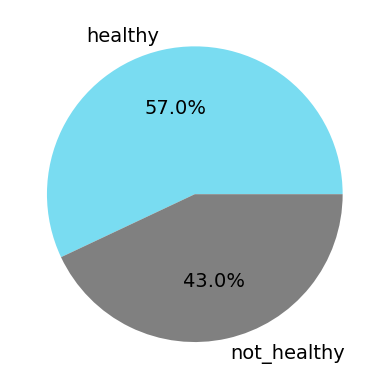

In [30]:
nut_val_df['healthy'].value_counts().plot.pie(autopct='%1.1f%%',colors = ['#79dcf1', 'grey'], textprops={'fontsize': 14})
plt.ylabel("")
plt.show()

C:\Users\Aviya Shapira\AppData\Local\Temp\ipykernel_23772\2950812459.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data =nut_val_df, x ="healthy", y ="protein",jitter=True, marker='o', alpha=0.7, palette =custom_palette, ax =axes[0, 0])
C:\Users\Aviya Shapira\AppData\Local\Temp\ipykernel_23772\2950812459.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data =nut_val_df, x ="healthy", y ="fat",jitter=True, marker='o', alpha=0.7, palette =custom_palette, ax =axes[0, 1])
C:\Users\Aviya Shapira\AppData\Local\Temp\ipykernel_23772\2950812459.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data =nut_val_df, x ="healthy", y ="calories",jitter=True, marker='o', alpha=0.7, palette =custom_palette, ax =axes[0, 2])
C:\Users\Aviya Shapira\AppData\Local\Temp\ipykernel_23772\2950812459.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
 

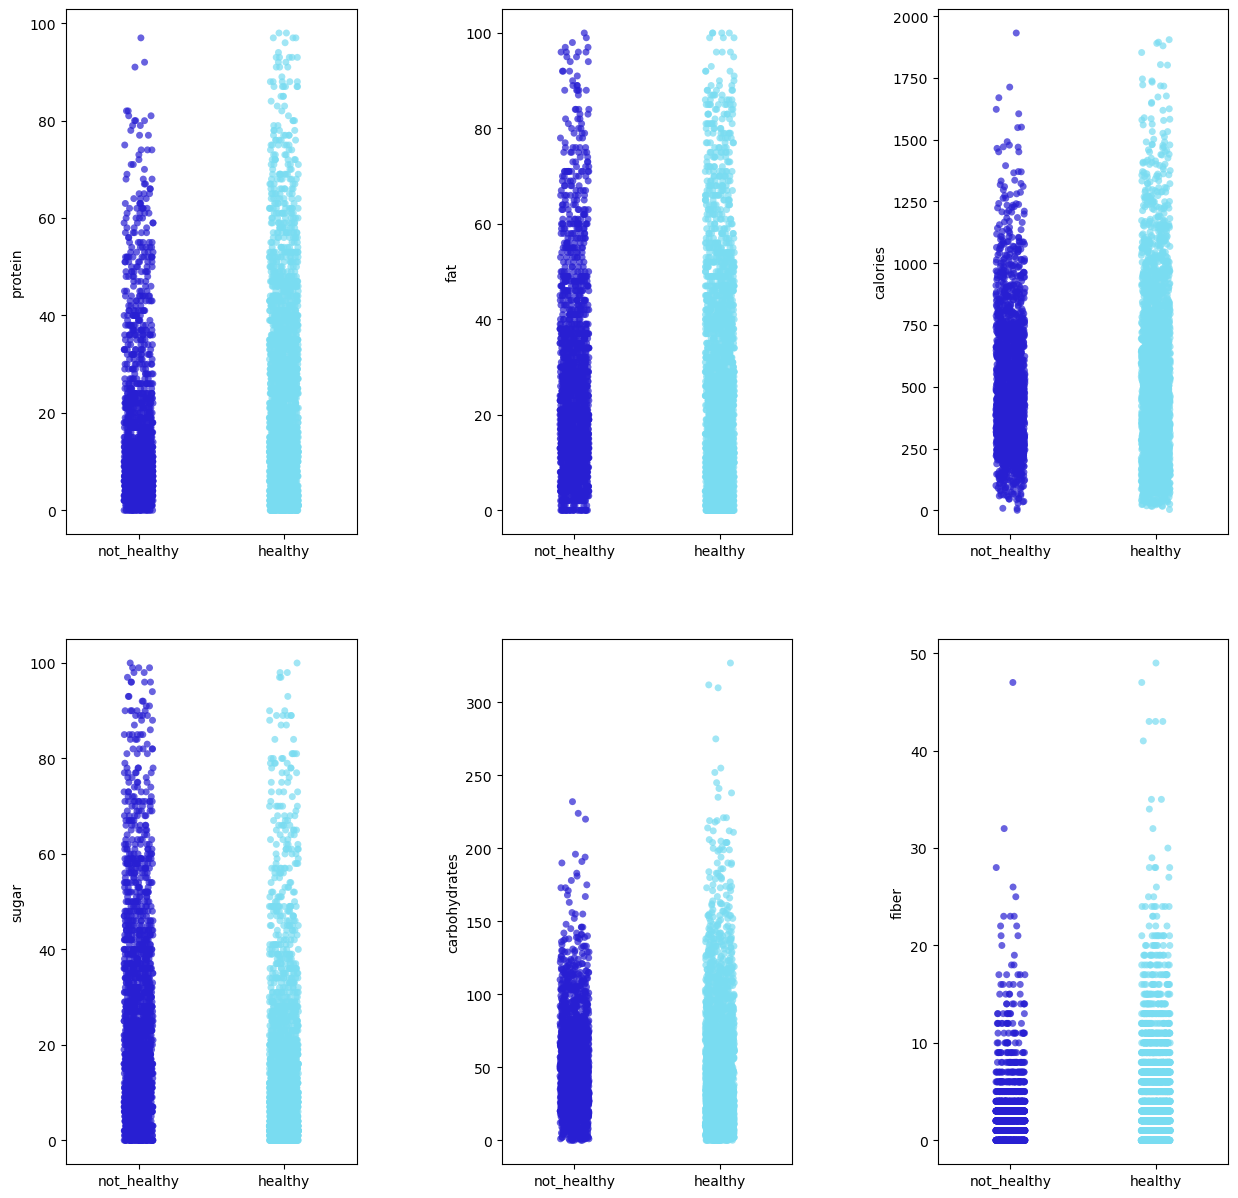

In [31]:
fig, axes = plt.subplots(2,3, figsize=(15,15))
plt.subplots_adjust(wspace = 0.5)
sns.stripplot(data =nut_val_df, x ="healthy", y ="protein",jitter=True, marker='o', alpha=0.7, palette =custom_palette, ax =axes[0, 0])
sns.stripplot(data =nut_val_df, x ="healthy", y ="fat",jitter=True, marker='o', alpha=0.7, palette =custom_palette, ax =axes[0, 1])
sns.stripplot(data =nut_val_df, x ="healthy", y ="calories",jitter=True, marker='o', alpha=0.7, palette =custom_palette, ax =axes[0, 2])
sns.stripplot(data =nut_val_df, x ="healthy", y ="sugar",jitter=True, marker='o', alpha=0.7, palette =custom_palette, ax =axes[1, 0])
sns.stripplot(data =nut_val_df, x ="healthy", y ="carbohydrates",jitter=True, marker='o', alpha=0.7, palette =custom_palette, ax =axes[1, 1])
sns.stripplot(data =nut_val_df, x ="healthy", y ="fiber",jitter=True, marker='o', alpha=0.7, palette =custom_palette, ax =axes[1, 2])
axes[0,0].set_xlabel('')
axes[0,1].set_xlabel('')
axes[0,2].set_xlabel('')
axes[1,0].set_xlabel('')
axes[1,1].set_xlabel('')
axes[1,2].set_xlabel('')
plt.show()

<div>
<img src="https://github.com/Aviyashap/project-tasty-/blob/main/values-02.jpg?raw=true" width="100%"/>
</div>

Is there a common denominator between the recipes that cannot be purchased through the website?

In [32]:
tasty_df['is_shoppable'].value_counts()

is_shoppable
True     4714
False     247
Name: count, dtype: int64

In [33]:
pie_data_shop =tasty_df.copy()
pie_data_shop= pie_data_shop[pie_data_shop['is_shoppable'] == True]
pie_data_shop.dropna(subset ="cuisine",inplace = True)
pie_data_not_shop =tasty_df.copy()
pie_data_not_shop.dropna(subset ="cuisine",inplace = True)
pie_data_not_shop =pie_data_not_shop[ pie_data_not_shop['is_shoppable'] == False]
all_val=tasty_df['cuisine'].value_counts()
data_shop=pie_data_shop['cuisine'].value_counts()
data_not_shop=pie_data_not_shop['cuisine'].value_counts()

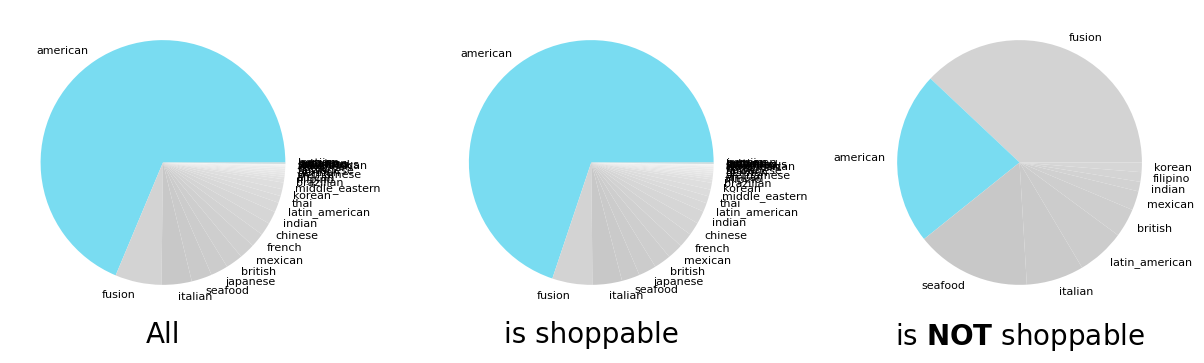

In [34]:
fig, axes = plt.subplots(figsize=(15, 5), ncols=3)
plt.subplots_adjust(wspace = 0.4)
colors = sns.color_palette()
all_val.plot.pie(
    colors = pei_colors,
    textprops={'fontsize': 8}, ax = axes[0])
data_shop.plot.pie(
    colors = pei_colors,
    textprops={'fontsize': 8}, ax = axes[1])
data_not_shop.plot.pie(
    colors = pei_colors_1,
    textprops={'fontsize': 8}, ax = axes[2])
axes[0].set_xlabel('All', fontsize=20)
axes[1].set_xlabel('is shoppable', fontsize=20)
title = 'is ' + r'$\bf{NOT}$' + ' shoppable'
axes[2].set_xlabel(title, fontsize=20)
axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
plt.show()

In [35]:
pie_data_not_shop['cuisine'] = pie_data_not_shop['cuisine'].apply(lambda x: 'american' if x == 'american' else 'not_american')

In [40]:
pie_data_shop['cuisine'] = pie_data_shop['cuisine'].apply(lambda x: 'american' if x == 'american' else 'not_american')

In [41]:
category_counts_1 = pie_data_shop['cuisine'].value_counts()
category_percentages_1 = (category_counts_1 / category_counts_1.sum()) * 100
category_percentages_1 = category_percentages_1.reset_index()
category_percentages_1.columns = ['cuisine', 'percentage']


category_counts = pie_data_not_shop['cuisine'].value_counts()
category_percentages = (category_counts / category_counts.sum()) * 100
category_percentages = category_percentages.reset_index()
category_percentages.columns = ['cuisine', 'percentage']

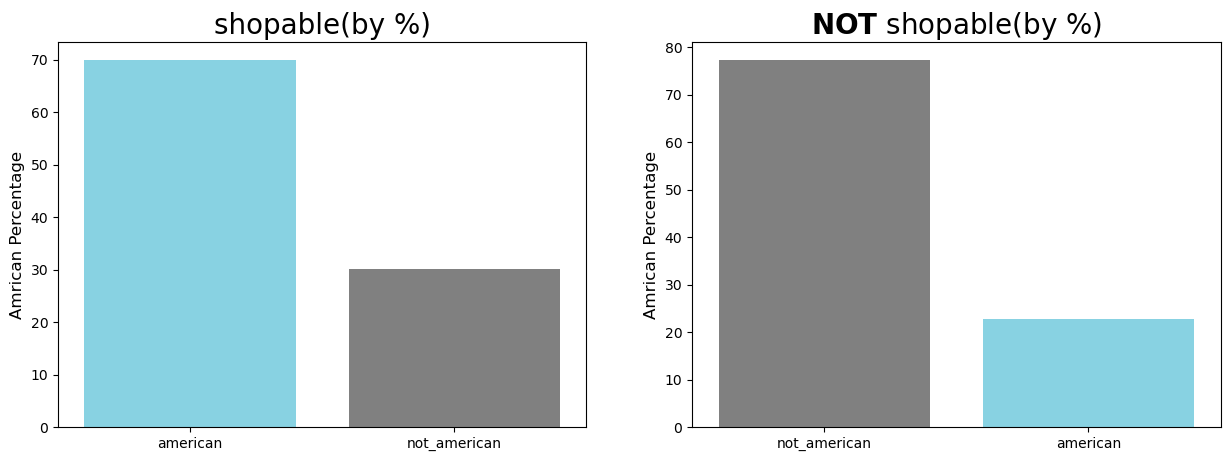

In [42]:
fig, axes = plt.subplots(figsize=(15, 5), ncols=2)
sns.barplot(palette = ['#79dcf1', 'grey'], y='percentage', x='cuisine', data=category_percentages_1, ax=axes[0])
sns.barplot(palette = ['grey', '#79dcf1'], y='percentage', x='cuisine', data=category_percentages, ax=axes[1])

title_1 = r'$\bf{NOT}$' + ' shopable(by %)'
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[0].set_ylabel('Amrican Percentage', fontsize=12)
axes[1].set_ylabel('Amrican Percentage', fontsize=12)
axes[0].set_title('shopable(by %)', fontsize=20)
axes[1].set_title(title_1, fontsize=20)
plt.show()

We tested several connection between the products that cannot be bought and different variables in the data.

Finally, we found that there is a connection between the kitchen of the recipe and the ability to purchase its products.
We can see that about 70% of the recipes on the website are associated with American cuisine, on the other hand, in the recipes where the products cannot be bought, only about 22% are American

In [43]:
tasty_df_fil = tasty_df.copy()
tasty_df_fil = tasty_df_fil[ tasty_df_fil['is_shoppable'] == False]
tasty_df_fil.dropna(subset ="cuisine",inplace = True)
order_y = tasty_df_fil['cuisine'].value_counts().sort_values(ascending=False).index

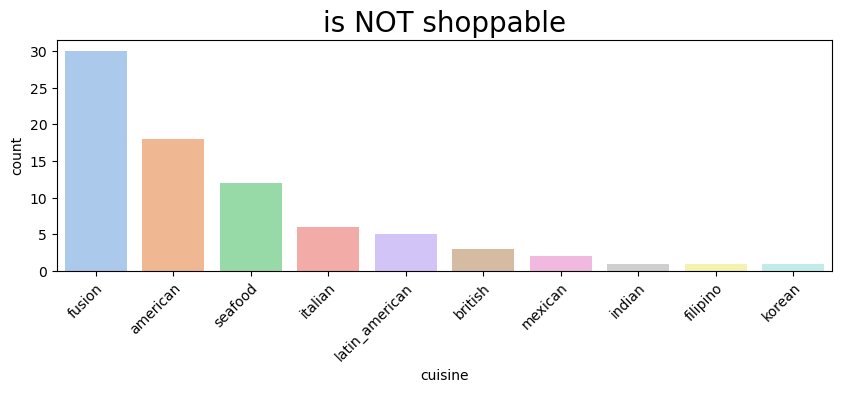

In [44]:
plt.figure(figsize=(10,3))
sns.countplot(x="cuisine",  data=tasty_df_fil, order= order_y, palette="pastel")
plt.title("is NOT shoppable", fontsize=20)
plt.ylabel("count")
plt.xlabel("cuisine")
plt.xticks(rotation=45, ha='right', rotation_mode='anchor') 
plt.show()

In [45]:
category_counts_3 = tasty_df_fil['cuisine'].value_counts()
category_percentages_3 = (category_counts_3 / category_counts_3.sum()) * 100
category_percentages_3 = category_percentages_3.reset_index()
category_percentages_3.columns = ['cuisine', 'percentage']

category_counts_4 = tasty_df['cuisine'].value_counts()
category_percentages_4 = (category_counts_4 / category_counts_4.sum()) * 100
category_percentages_4 = category_percentages_4.reset_index()
category_percentages_4.columns = ['cuisine', 'percentage']


In [46]:
category_percentages_4.head(5)

,cuisine,percentage
0,american,68.685284
1,fusion,6.118607
2,italian,3.984939
3,seafood,2.698463
4,japanese,2.290555


In [47]:
category_percentages_3.head(5)

,cuisine,percentage
0,fusion,37.974684
1,american,22.784810
2,seafood,15.189873
3,italian,7.594937
4,latin_american,6.329114


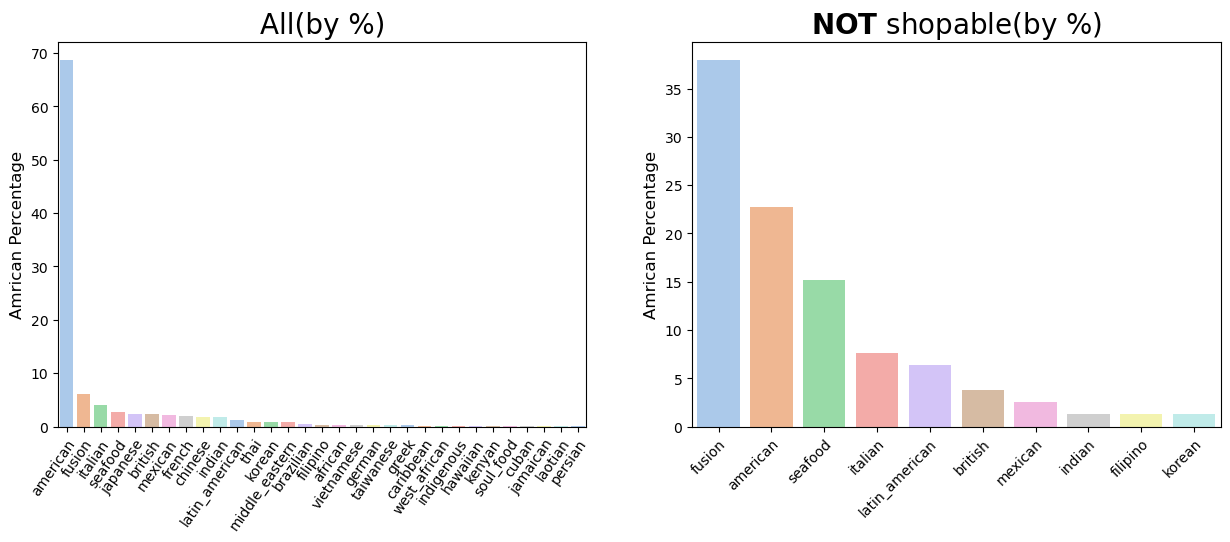

In [48]:
fig, ax = plt.subplots(figsize=(15, 5), ncols=2)
sns.barplot(y ='percentage', x='cuisine', data = category_percentages_4, ax=ax[0], palette="pastel")
sns.barplot(y ='percentage', x='cuisine', data = category_percentages_3, ax=ax[1], palette="pastel")

title_1 = r'$\bf{NOT}$' + ' shopable(by %)'
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].set_ylabel('Amrican Percentage', fontsize=12)
ax[1].set_ylabel('Amrican Percentage', fontsize=12)
ax[0].set_title('All(by %)', fontsize=20)
ax[1].set_title(title_1, fontsize=20)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor') 
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=55, ha='right', rotation_mode='anchor') 
plt.show()

It can be seen that the highest value for components that cannot be purchased are those defined as a "fusion" 
And this despite the fact that they make up a total of 6% of the total recipes



<div>
<img src="https://github.com/Aviyashap/project-tasty-/blob/main/values3.jpg?raw=true" width="100%"/>
</div>

<span style="color: #000000; font-size: 24px">description<span>
<span style="color: #000000; font-size: 14px">Is there a connection between the length of the description and the fact that the recipe is classified according to a certain dietary</span>

In [49]:
desctip_df = tasty_df.copy()
desctip_df.dropna(subset = 'description',inplace = True)

In [50]:
def count_words(val):
    
    return len(val.split())
desctip_df['word_count'] = desctip_df['description'].apply(count_words)
desctip_df['word_count']

0       37
19      32
35      36
48      69
76      41
        ..
4910    48
4922    67
4930    37
4934    40
4942    24
Name: word_count, Length: 979, dtype: int64

In [51]:
desctip_df['word_count'].unique()

array([ 37,  32,  36,  69,  41,  34,  43,  29,  55,  71,  40,  68,  63,
        52,  65,  45,  50,  26,  31,  24,  38,  44,  60,  42,  33,  16,
        56,  47,  20,  49,  48,  13,  25,  58,  22,  61,  12,   5,  35,
        14,  21,  27,  17,  46,  51,  66,  91,  88,  83,  39,  62,  64,
        85,  72,  75,  86,  70,  53,  74,  82,  67,  59,  81,  57,   4,
        76,  28,  18,  73,  11,  30,  23,  54,   9,  92,  94,  15, 139,
        10,   7,  79,   0,  78,  89,  87,  19,   6, 105, 114,  80,   8,
        96], dtype=int64)

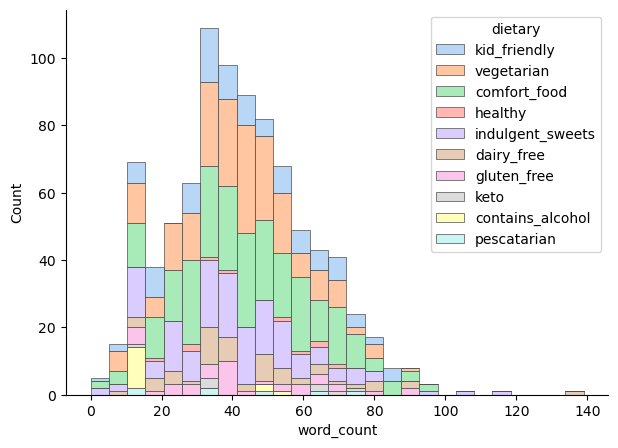

In [52]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(desctip_df,
    x="word_count", hue='dietary', multiple="stack", palette="pastel", edgecolor=".3", linewidth=.5)
plt.show()

In [53]:
counts = desctip_df['dietary'].value_counts()
counts_categories = counts[counts > 41].index
desctip_df_1 = desctip_df[desctip_df['dietary'].isin(counts_categories)]

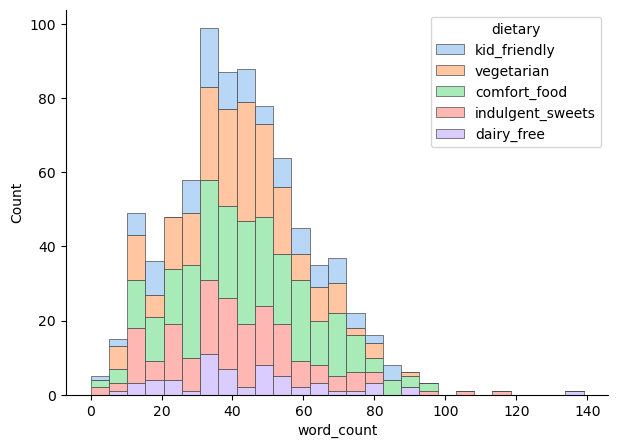

In [54]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(desctip_df_1,
    x="word_count", hue='dietary', multiple="stack", palette="pastel", edgecolor=".3", linewidth=.5)
plt.show()


<span style="color: #000000; font-size: 24px">rating_divide<span>


In [55]:
tasty_df['rating_divide'] = tasty_df["ratings_negative"]/tasty_df["ratings_positive"]

In [56]:
tasty_df['rating_divide'].value_counts()

rating_divide
0.000000    243
0.166667     44
0.200000     39
0.500000     38
0.333333     38
           ... 
0.082164      1
0.211694      1
0.052525      1
0.038540      1
0.550000      1
Name: count, Length: 2847, dtype: int64

[0.05263158 0.        ]
[0.16981132 0.34549356]
[0. 0.]
[0.34549356 0.34549356]
[0.0952381 0.0952381]


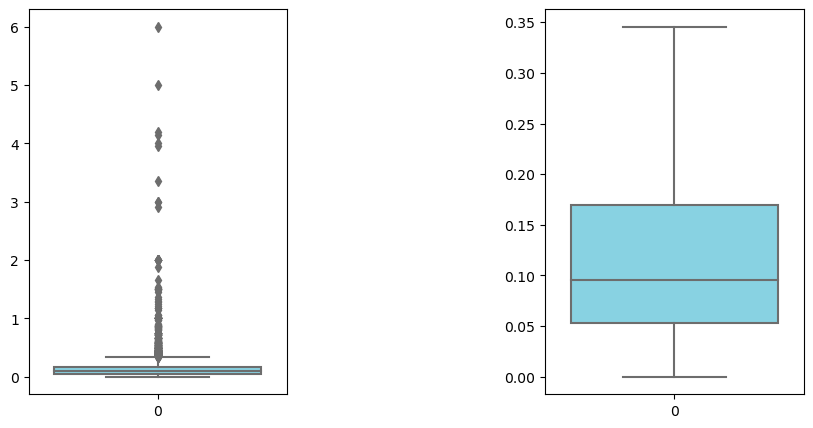

In [57]:
fig, axes = plt.subplots(figsize=(10, 5), ncols=2)
plt.subplots_adjust(wspace = 1)
sns.boxplot(data = tasty_df['rating_divide'], showfliers=True, ax = axes[0], palette=[custom_palette[1]])
ax = sns.boxplot(data = tasty_df['rating_divide'], showfliers=False, ax = axes[1], palette=[custom_palette[1]])
for line in ax.lines:
    print(line.get_ydata())

In [58]:
rating_unusual = tasty_df[tasty_df['rating_divide'] > 0.35]
len(rating_unusual)

367

In [59]:
rating_usual = tasty_df[tasty_df['rating_divide'] < 0.35]

In [60]:
sort_rat =tasty_df.copy()
sort_rat= sort_rat.sort_values(by = 'ratings_positive')

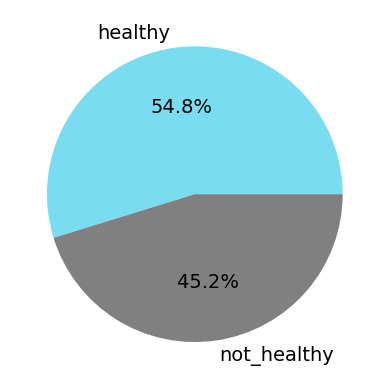

In [61]:
rating_unusual['healthy'].value_counts().plot.pie(autopct='%1.1f%%',colors = ['#79dcf1', 'grey'], textprops={'fontsize': 14})
plt.ylabel("")
plt.show()

In [62]:
rating_unusual.isnull().sum()


country                0
description          248
id_                    0
keywords             239
is_shoppable           0
language               0
name                   0
slug                   0
video_url            116
is_licensed_video      0
is_community           0
inspired_by            0
linked_recipes       363
tags                   0
cook_time              0
prep_time              0
total_time             0
ratings_negative       0
ratings_positive       0
score                  0
protein               44
fat                   44
calories              44
sugar                 44
carbohydrates         44
fiber                 44
healthy                0
holiday                0
cuisine              204
seasonal             320
dietary               40
rating_divide          0
dtype: int64

<Axes: >

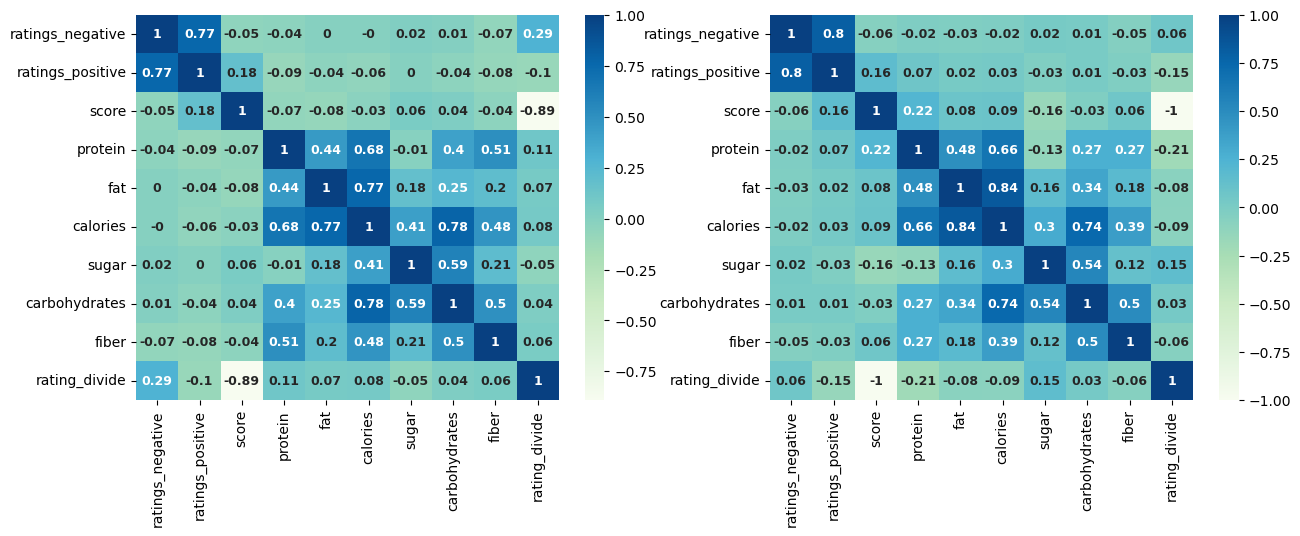

In [63]:

features_1= ['ratings_negative', 'ratings_positive', 'score', 'protein', 'fat', 'calories', 'sugar', 'carbohydrates', 'fiber','rating_divide']
fig, axes = plt.subplots(figsize=(15, 5), ncols=2)
correlations_1= rating_unusual[features_1].corr().round(2)
correlations_2= rating_usual[features_1].corr().round(2)
sns.heatmap(data=correlations_1,cmap= 'GnBu',annot=True, ax=axes[0],
            annot_kws = {'fontsize' : 9, 'fontweight' : 'bold'})
sns.heatmap(data=correlations_2, cmap= 'GnBu',annot=True, ax=axes[1],
            annot_kws = {'fontsize' : 9, 'fontweight' : 'bold'})

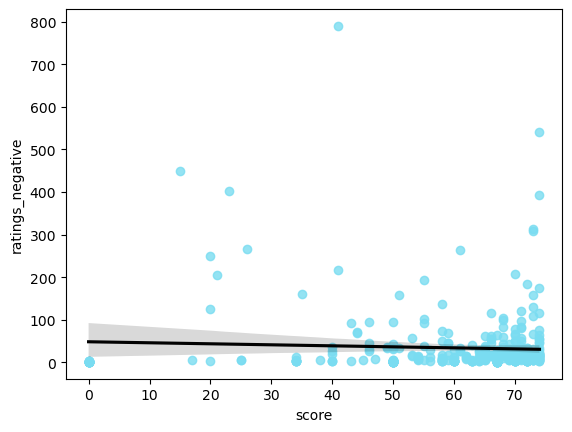

In [64]:
sns.regplot(data = rating_unusual, x = 'score', y = 'ratings_negative',scatter_kws={"color": "#79dcf1"}, line_kws={"color": "black"})
plt.show()

C:\Users\Aviya Shapira\anaconda3\Lib\site-packages\numpy\core\function_base.py:157: RuntimeWarning: invalid value encountered in multiply
  y *= step
C:\Users\Aviya Shapira\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


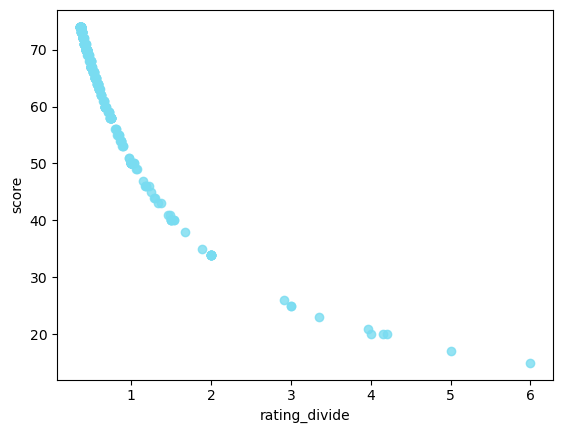

In [65]:
sns.regplot(data = rating_unusual, x = 'rating_divide', y = 'score',scatter_kws={"color": "#79dcf1"}, line_kws={"color": "black"})
plt.show()

In [66]:
rating_unusual_big_1 = rating_unusual[rating_unusual['rating_divide'] > 1]
len(rating_unusual_big_1)

58

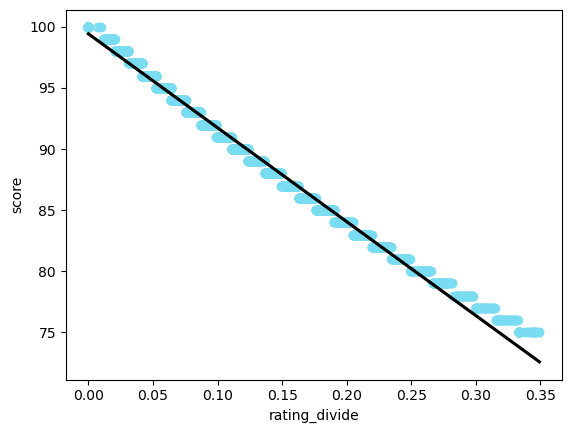

In [67]:
sns.regplot(data = rating_usual, x = 'rating_divide', y = 'score',scatter_kws={"color": "#79dcf1"}, line_kws={"color": "black"})
plt.show()

[1. 0.]
[ 5. 11.]
[0. 0.]
[11. 11.]
[3. 3.]


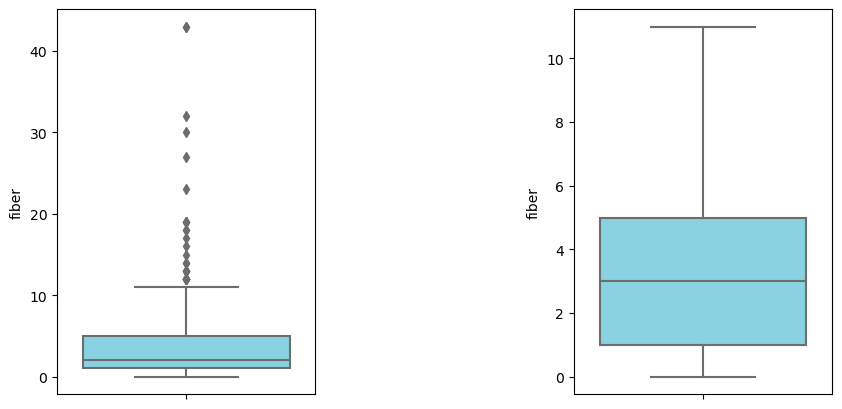

In [68]:
fig, axes = plt.subplots(figsize=(10, 5), ncols=2)
plt.subplots_adjust(wspace = 1)
us = sns.boxplot(y = rating_unusual['fiber'], showfliers=True, ax = axes[0], palette=[custom_palette[1]])
un = sns.boxplot(y = rating_usual['fiber'], showfliers=False, ax = axes[1],  palette=[custom_palette[1]])
for line in un.lines:
    print(line.get_ydata())